In [1]:
import seaborn as sns
import pandas as pd
sns.set_style("whitegrid")

In [2]:
path = "Z:/JulietteG/6-Etutes_Antares/BP23_A_EU_Xeq_socle_thermique_2041_postcalage_marg98_stock/user"

In [3]:
suf = '_constant'

# Facteur de charge annuel

In [52]:
df = pd.read_excel(path+"/facteur_de_charge"+suf+".xlsx")
# df["name"] = df["name"].apply(lambda x:x.split("/")[-1].split("-")[-1])
# df["name"] = df["name"].apply(lambda x:"initial_simulation" if x=='vu_initial_other_vu' else pd.NA if x in ['initial_simulation','initial_simulation_zmargcost'] else x)
df.dropna(inplace=True)

In [53]:
df["Sim"] = df["name"].apply(lambda x:".".join(x.split("_")[1:]) if "40" in x else x.split("_")[1].replace("simbis","_")) 
df["Scénario"] = df["mcYear"].apply(lambda x:str(x))
df["Facteur de charge annuel"] = df["fc"]


In [54]:
df["name"].unique()

array(['vu_-40_81', 'vu_-40.84',
       'fc60_51simbisheur_other_vu_mean_pen0_untilconvergence',
       'fc60_5simbisheur_other_vu_mean_pen0_untilconvergence',
       'fc60_1simbisheur_other_vu_mean_pen0_untilconvergence',
       'fc60_1simbisvu_other_vu_mean_pen0_untilconvergence', 'vu_-40.83'],
      dtype=object)

In [55]:
df[df.mcYear==11]

,mcYear,zone,charge,capa,fc,name,Sim,Scénario,Facteur de charge annuel
0,11,eu,536895894,9.965149e+08,0.538774,vu_-40_81,-40.81,11,0.538774
10,11,eu,626584059,9.965149e+08,0.628775,vu_-40.84,-40.84,11,0.628775
20,11,eu,622270030,9.965149e+08,0.624446,fc60_51simbisheur_other_vu_mean_pen0_untilconv...,51_heur,11,0.624446
30,11,eu,625273406,9.965149e+08,0.627460,fc60_5simbisheur_other_vu_mean_pen0_untilconve...,5_heur,11,0.627460
40,11,eu,625277660,9.965149e+08,0.627464,fc60_1simbisheur_other_vu_mean_pen0_untilconve...,1_heur,11,0.627464
50,11,eu,625867352,9.965149e+08,0.628056,fc60_1simbisvu_other_vu_mean_pen0_untilconverg...,1_vu,11,0.628056
60,11,eu,625275186,9.965149e+08,0.627462,vu_-40.83,-40.83,11,0.627462


In [56]:
df[["name","fc"]].groupby(["name"]).mean()

,fc
name,
fc60_1simbisheur_other_vu_mean_pen0_untilconvergence,0.602613
fc60_1simbisvu_other_vu_mean_pen0_untilconvergence,0.603885
fc60_51simbisheur_other_vu_mean_pen0_untilconvergence,0.599129
fc60_5simbisheur_other_vu_mean_pen0_untilconvergence,0.602614
vu_-40.83,0.602613
vu_-40.84,0.604587
vu_-40_81,0.518024


<Axes: xlabel='Scénario', ylabel='Facteur de charge annuel'>

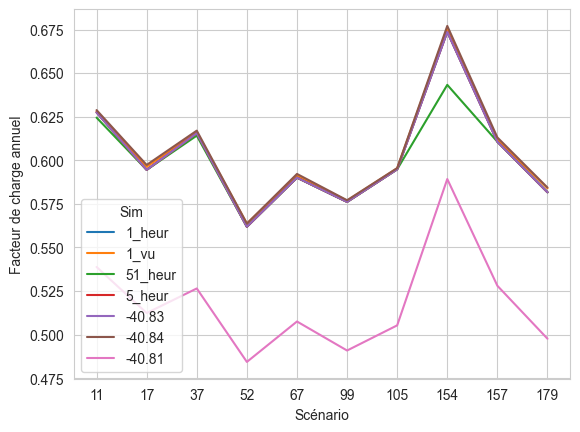

In [57]:
sns.lineplot(x="Scénario", y="Facteur de charge annuel",
             hue="Sim",hue_order=['1_heur', '1_vu', '51_heur', '5_heur', '-40.83', '-40.84',
       '-40.81'],data=df)

# Facteur de charge hebdo

In [22]:
df = pd.read_excel(path+"/facteur_de_charge_hebdo"+suf+".xlsx")
# df["name"] = df["name"].apply(lambda x:x.split("/")[-1].split("-")[-1])
# df["name"] = df["name"].apply(lambda x:"initial_simulation" if x=='vu_initial_other_vu' else pd.NA if x in ['initial_simulation','initial_simulation_zmargcost'] else x)
df.dropna(inplace=True)

In [23]:
df["Sim"] = df["name"].apply(lambda x:".".join(x.split("_")[1:]) if "40" in x else x.split("_")[1].replace("simbis","_")) 
df["Scénario"] = df["mcYear"].apply(lambda x:str(x))
df["Semaine"] = df["week"]
df["Facteur de charge hebdomadaire"] = df["fc_direct"]

In [24]:
df[(df.mcYear==11)&(df.week==0)]

,mcYear,week,zone,charge,capa_direct,fc_direct,name,Sim,Scénario,Semaine,Facteur de charge hebdomadaire
0,11,0,eu,3200238,1.916375e+07,0.166994,vu_-40_81,-40.81,11,0,0.166994
520,11,0,eu,3798799,1.916375e+07,0.198228,vu_-40.84,-40.84,11,0,0.198228
1040,11,0,eu,3795061,1.916375e+07,0.198033,fc60_51simbisheur_other_vu_mean_pen0_untilconv...,51_heur,11,0,0.198033
1560,11,0,eu,3795061,1.916375e+07,0.198033,fc60_5simbisheur_other_vu_mean_pen0_untilconve...,5_heur,11,0,0.198033
2080,11,0,eu,3795061,1.916375e+07,0.198033,fc60_1simbisheur_other_vu_mean_pen0_untilconve...,1_heur,11,0,0.198033
2600,11,0,eu,3799427,1.916375e+07,0.198261,fc60_1simbisvu_other_vu_mean_pen0_untilconverg...,1_vu,11,0,0.198261
3120,11,0,eu,3795058,1.916375e+07,0.198033,vu_-40.83,-40.83,11,0,0.198033


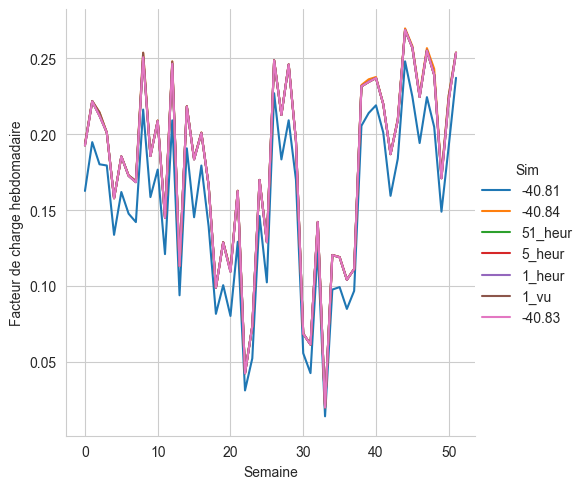

In [26]:
sns.relplot(x="Semaine", y="Facteur de charge hebdomadaire",
hue="Sim",
data=df[df.mcYear==67],kind="line")

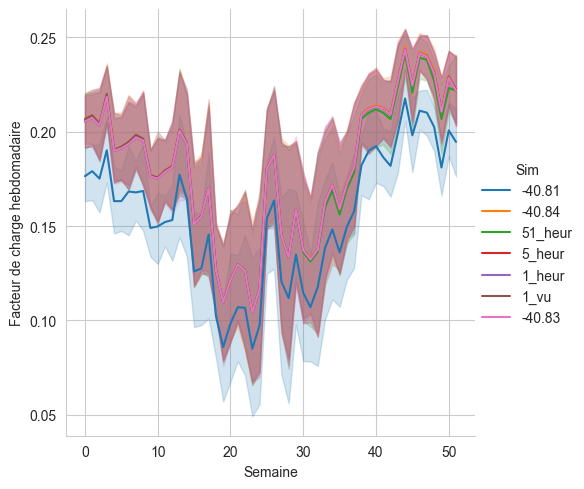

In [25]:
sns.relplot(x="Semaine", y="Facteur de charge hebdomadaire",
hue="Sim",
data=df,kind="line")

# Couts

In [27]:
df_1 = pd.read_excel(path+"/coûts"+suf+".xlsx")
df_2 = pd.read_excel(path+"/facteur_de_charge"+suf+".xlsx")
df = pd.merge(df_2,df_1, on=["name","mcYear"])
df.dropna(inplace=True)

In [28]:
df["Sim"] = df["name"].apply(lambda x:".".join(x.split("_")[1:]) if "40" in x else x.split("_")[1].replace("simbis","_"))
df["Scénario"] = df["mcYear"].apply(lambda x:str(x))


In [29]:
df[df.mcYear==11]

,mcYear,zone,charge,capa,fc,name,ov_cost,unsp_cost,Sim,Scénario
0,11,eu,536895894,9.965149e+08,0.538774,vu_-40_81,92493183122,129073011,-40.81,11
10,11,eu,626584059,9.965149e+08,0.628775,vu_-40.84,92499764904,129073025,-40.84,11
20,11,eu,622270030,9.965149e+08,0.624446,fc60_51simbisheur_other_vu_mean_pen0_untilconv...,92495814365,129072975,51_heur,11
30,11,eu,625273406,9.965149e+08,0.627460,fc60_5simbisheur_other_vu_mean_pen0_untilconve...,92495171422,129073053,5_heur,11
40,11,eu,625277660,9.965149e+08,0.627464,fc60_1simbisheur_other_vu_mean_pen0_untilconve...,92499872516,129073070,1_heur,11
50,11,eu,625867352,9.965149e+08,0.628056,fc60_1simbisvu_other_vu_mean_pen0_untilconverg...,92497783812,129072998,1_vu,11
60,11,eu,625275186,9.965149e+08,0.627462,vu_-40.83,92497385703,129072988,-40.83,11


In [47]:
df_mean = df[["name","ov_cost","charge",'fc']].groupby(["name"]).mean().reset_index(drop=False)
df_mean["Sim"] = df_mean["name"].apply(lambda x:".".join(x.split("_")[1:]) if "40" in x else x.split("_")[1].replace("simbis","_")) 
df_mean["Production moyenne (TWh)"] = df_mean["charge"]/1e6
df_mean["Coût annuel moyen"] = df_mean["ov_cost"]

In [48]:
df_mean

,name,ov_cost,charge,fc,Sim,Production moyenne (TWh),Coût annuel moyen
0,fc60_1simbisheur_other_vu_mean_pen0_untilconve...,9.770560e+10,600512819.0,0.602613,1_heur,600.512819,9.770560e+10
1,fc60_1simbisvu_other_vu_mean_pen0_untilconverg...,9.770528e+10,601780087.6,0.603885,1_vu,601.780088,9.770528e+10
2,fc60_51simbisheur_other_vu_mean_pen0_untilconv...,9.770450e+10,597041250.4,0.599129,51_heur,597.041250,9.770450e+10
3,fc60_5simbisheur_other_vu_mean_pen0_untilconve...,9.770561e+10,600513682.8,0.602614,5_heur,600.513683,9.770561e+10
4,vu_-40.83,9.770493e+10,600512655.1,0.602613,-40.83,600.512655,9.770493e+10
5,vu_-40.84,9.770514e+10,602480314.9,0.604587,-40.84,602.480315,9.770514e+10
6,vu_-40_81,9.769766e+10,516218592.6,0.518024,-40.81,516.218593,9.769766e+10


In [51]:
df_mean["Sim"].unique()

array(['1_heur', '1_vu', '51_heur', '5_heur', '-40.83', '-40.84',
       '-40.81'], dtype=object)

<Axes: xlabel='Production moyenne (TWh)', ylabel='Coût annuel moyen'>

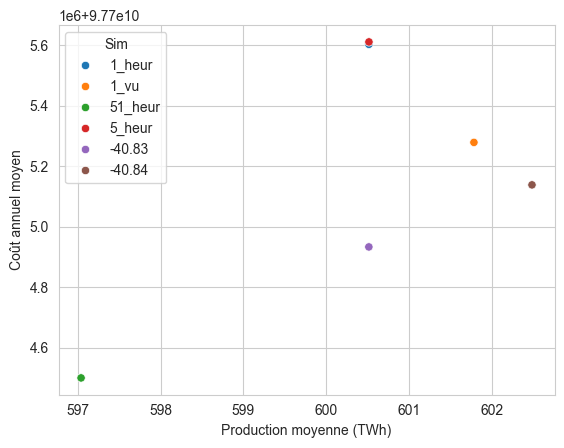

In [49]:
sns.scatterplot(x="Production moyenne (TWh)",y="Coût annuel moyen",
             hue="Sim",data=df_mean[df_mean.fc>=0.52])